red wine 과 white wine 테이블 합치기

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


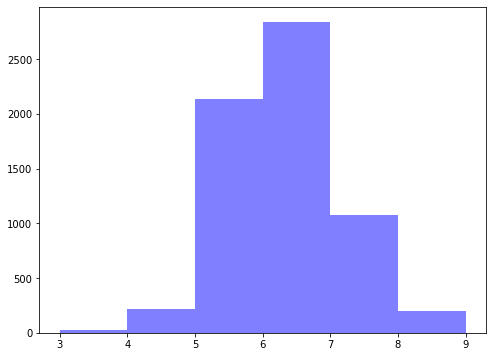

In [1]:
import pandas as pd

#read_csv: csv파일을 읽는 명령 
#sep: 파일이 어떤 기호로 분리되어 있는지 표시하는 것. 여기서는 데이터가 ;로 나누어져 있다.
red_wine = pd.read_csv('./winequality-red.csv', sep = ';')
white_wine = pd.read_csv('./winequality-white.csv', sep = ';')

red_wine['color'] = 1 #새로운 column, color를 추가해서 1로 저장
red_wine.head()
white_wine['color'] = 0
white_wine.head()

#두 pandas dataframe을 하나로 합침
#조건: dataset들의 열 단위가 일치해야 한다. 
wine = pd.concat([red_wine, white_wine])
wine.info()

#quality column의 unique를 확인함
#unique: 유일한 값 찾기
wine['quality'].unique()

import matplotlib.pyplot as plt
plt.figure(figsize = (8, 6))
#히스토그램 그려주기 
#alpha = 0연함 ~ 1진함 색 진하기의 정도 
plt.hist(wine['quality'], bins = 6, facecolor = 'blue', alpha = 0.5)
plt.show()

wine['quality'].value_counts()
#유일한 값 별 개수 세기 

#저장하기. to_csv명령으로 해당 변수의 내용을 저장할 수 있음. ,로 구분하겠다.
#wine.csv 가 생성되었다는 것을 볼 수 있다. 
wine.to_csv('./wine.csv', sep =',')

둘이 분류 시켜보기

In [2]:
#y축을 color로 만들겠다.
y = wine['color']
#color를 열(1)단위로 지우겠다. 0이면 행단위
X = wine.drop(['color'], axis = 1)
X.head()

#훈련셋, 테스트셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.2, random_state = 13)

import numpy as np
np.unique(y_train, return_counts = True)
#(array([0, 1]), array([3913, 1284]))

#logistic regression으로 훈련하기
from sklearn.linear_model import LogisticRegression
#solver: 알고리즘 선택
#C: 정규화를 얼마나 강하게 할 것인가
log_reg = LogisticRegression(random_state = 13, solver = 'liblinear', C = 10.)
log_reg.fit(X_train, y_train)

#훈련용 데이터의 accuracy 확인
from sklearn.metrics import accuracy_score
pred = log_reg.predict(X_train)
accuracy_score(y_train, pred) #와인을 거의 정확하게 분류를 했다
#테스트용 데이터의 accuracy 확인
pred = log_reg.predict(X_test)
accuracy_score(y_test, pred) 

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

#array([[980,   5],
#      [ 11, 304]]) [0인데 0인 것, 0인데 1로 분류 -오차][1인데 1인 것, 1인데 0으로 분류 -오차]

array([[980,   5],
       [ 11, 304]])

seaborn을 활용하자

0.9884615384615385

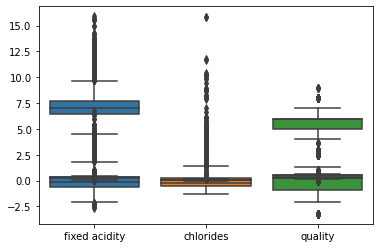

In [3]:
import seaborn as sns
#특징을 세 개만 사용해서 레드와인, 화이트와인 분류하기
sns.boxplot(data = X[['fixed acidity', 'chlorides', 'quality']])

#특성간 격차를 줄이는 대표적인 방법 - normalization: minmaxscaler, standardscaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

MMS = MinMaxScaler() #최솟값 0, 그리고 최댓값 1이 되도록 스케일링 
SS = StandardScaler() #평균과 표준편차가 같아 지도록 스케일링
MMS.fit(X)
SS.fit(X)
X_mms = MMS.transform(X)
X_ss = SS.transform(X)

#minmaxscaler, standardscaler 두 방법의 차이를 알기 위해 
X_ss_pd = pd.DataFrame(X_ss, columns = X.columns)
X_mms_pd = pd.DataFrame(X_mms, columns = X.columns)

sns.boxplot(data = X_mms_pd[['fixed acidity', 'chlorides', 'quality']])
sns.boxplot(data = X_ss_pd[['fixed acidity', 'chlorides', 'quality']])

#minmaxscaler로 학습한 결과 
X_out = X_mms_pd #mms를 ss로 바꾸면 standardscaler로 학습한 결과를 알 수 있음
X_train, X_test, y_train, y_test = \
train_test_split(X_out, y, test_size = 0.2, random_state = 13)

log_reg = LogisticRegression(random_state = 13, solver = 'liblinear', C = 10.)
log_reg.fit(X_train, y_train)

pred = log_reg.predict(X_test)
accuracy_score(y_test, pred)